# Builing a Recommender System Algorithm on Books Data to recommend books for different users with similarities within the users

In [104]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#Read the data
book=pd.read_csv(r'C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\10. Recommendation System\book.csv',  encoding = "ISO-8859-1")

In [106]:
book.head()

Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6

# Exploratory Data Analysis

In [107]:
book.shape

(10000, 4)

In [108]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [109]:
#Check for missing/null values
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [110]:
#Check for duplicate data
duplicate=book[book.duplicated()]
duplicate

Empty DataFrame
Columns: [Unnamed: 0, User.ID, Book.Title, Book.Rating]
Index: []

In [111]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [112]:
book.shape

(10000, 4)

In [113]:
book.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [114]:
book['Book.Title'].value_counts()

Fahrenheit 451                                                                                                                                                                                               5
Charlie and the Chocolate Factory                                                                                                                                                                            4
The Subtle Knife (His Dark Materials, Book 2)                                                                                                                                                                4
Vanished                                                                                                                                                                                                     4
Ender's Game (Ender Wiggins Saga (Paperback))                                                                                                                               

In [115]:
#Total movies length
len(book['Book.Title'].unique())

9659

In [116]:
book1=book.drop('Unnamed: 0', axis=1)
book1.head()

User.ID                                         Book.Title  Book.Rating
0   276726                                Classical Mythology            5
1   276729                                       Clara Callan            3
2   276729                               Decision in Normandy            6
3   276736  Flu: The Story of the Great Influenza Pandemic...            8
4   276737                             The Mummies of Urumchi            6

In [117]:
#Renaming Columns names so that we can apply methods which will work on series data
book1=book1.rename(columns={'User.ID': 'Userid', 'Book.Title':'Booktitle', 'Book.Rating':'Bookrating'})
book1.head()

Userid                                          Booktitle  Bookrating
0  276726                                Classical Mythology           5
1  276729                                       Clara Callan           3
2  276729                               Decision in Normandy           6
3  276736  Flu: The Story of the Great Influenza Pandemic...           8
4  276737                             The Mummies of Urumchi           6

In [118]:
# Length of the Users
len(book1['Userid'].unique())

2182

In [119]:
book1.Bookrating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Bookrating, dtype: int64

<AxesSubplot:>

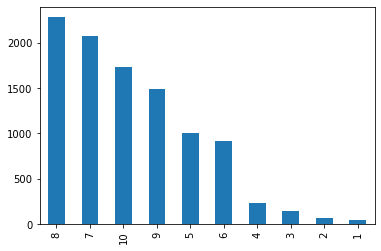

In [120]:
#Ratings Given by the users
book1['Bookrating'].value_counts().plot(kind='bar')

# From the above bar graph the highest ratings are given as 8 followed by 7, only few customers gave ratings in between 1-4 for several  books

In [121]:
#Length of the ratings/Rating Scale 
len(list(book1['Booktitle'].groupby(book1['Bookrating'])))

10

In [124]:
#making a pivot table with columns as Book_Title and index as user_id, bookratings are the values
book_df=book1.pivot_table(index='Userid', columns='Booktitle', values='Bookrating')
book_df.head()

Booktitle   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
Userid                                                                        
8                           NaN                                         NaN   
9                           NaN                                         NaN   
10                          NaN                                         NaN   
12                          NaN                                         NaN   
14                          NaN                                         NaN   

Booktitle   Repairing PC Drives &amp  '48  \
Userid                                      
8                                NaN  NaN   
9                                NaN  NaN   
10                               NaN  NaN   
12                               NaN  NaN   
14                               NaN  NaN   

Booktitle  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
Userid                                                                             
8                                                        NaN                       
9                                                        NaN                       
10                                                       NaN                       
12                                                       NaN                       
14                                                       NaN                       

Booktitle  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
Userid                                                                    
8                                                        NaN              
9                                                        NaN              
10                                                       NaN              
12                                                       NaN              
14                                                       NaN              

Booktitle  01-01-00: A Novel of the Millennium  \
Userid                                           
8                                          NaN   
9                                          NaN   
10                                         NaN   
12                                         NaN   
14                                         NaN   

Booktitle  1,401 More Things That P*Ss Me Off  10 Commandments Of Dating  \
Userid                                                                     
8                                         NaN                        NaN   
9                                         NaN                        NaN   
10                                        NaN                        NaN   
12                                        NaN                        NaN   
14                                        NaN                        NaN   

Booktitle  100 Great Fantasy Short, Short Stories  ...  \
Userid                                             ...   
8                                             NaN  ...   
9                                             NaN  ...   
10                                            NaN  ...   
12                                            NaN  ...   
14                                            NaN  ...   

Booktitle  Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)  \
Userid                                                                   
8                                                        NaN             
9                                                        NaN             
10                                                       NaN             
12                                                       NaN             
14                                                       NaN             

Booktitle  \Even Monkeys Fall from Trees\ and Other Japanese Proverbs  \
Userid                                                                  
8                                                        Na

In [125]:
book_df.columns

Index([' Jason, Madison &amp', ' Other Stories;Merril;1985;McClelland &amp',
       ' Repairing PC Drives &amp', ''48',
       ''O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities',
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '01-01-00: A Novel of the Millennium',
       '1,401 More Things That P*Ss Me Off', '10 Commandments Of Dating',
       '100 Great Fantasy Short, Short Stories',
       ...
       'Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)',
       '\Even Monkeys Fall from Trees\ and Other Japanese Proverbs',
       '\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment',
       '\More More More,\ Said the Baby', '\O\ Is for Outlaw',
       '\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character',
       '\Well, there's your problem\: Cartoons', 'iI Paradiso Degli Orchi',
       'stardust', 'Ã?Â?bermorgen.'],
      dtype='object', name='Booktitle', length=9659)

In [126]:
book_df.isnull().sum()

Booktitle
 Jason, Madison &amp                                                                                                                                                                                         2181
 Other Stories;Merril;1985;McClelland &amp                                                                                                                                                                   2181
 Repairing PC Drives &amp                                                                                                                                                                                    2181
'48                                                                                                                                                                                                          2181
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities                                                                                 

In [129]:
#Fill NaNs with 0
book_df.fillna(0, inplace=True)
book_df.head()

Booktitle   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
Userid                                                                        
8                           0.0                                         0.0   
9                           0.0                                         0.0   
10                          0.0                                         0.0   
12                          0.0                                         0.0   
14                          0.0                                         0.0   

Booktitle   Repairing PC Drives &amp  '48  \
Userid                                      
8                                0.0  0.0   
9                                0.0  0.0   
10                               0.0  0.0   
12                               0.0  0.0   
14                               0.0  0.0   

Booktitle  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
Userid                                                                             
8                                                        0.0                       
9                                                        0.0                       
10                                                       0.0                       
12                                                       0.0                       
14                                                       0.0                       

Booktitle  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
Userid                                                                    
8                                                        0.0              
9                                                        0.0              
10                                                       0.0              
12                                                       0.0              
14                                                       0.0              

Booktitle  01-01-00: A Novel of the Millennium  \
Userid                                           
8                                          0.0   
9                                          0.0   
10                                         0.0   
12                                         0.0   
14                                         0.0   

Booktitle  1,401 More Things That P*Ss Me Off  10 Commandments Of Dating  \
Userid                                                                     
8                                         0.0                        0.0   
9                                         0.0                        0.0   
10                                        0.0                        0.0   
12                                        0.0                        0.0   
14                                        0.0                        0.0   

Booktitle  100 Great Fantasy Short, Short Stories  ...  \
Userid                                             ...   
8                                             0.0  ...   
9                                             0.0  ...   
10                                            0.0  ...   
12                                            0.0  ...   
14                                            0.0  ...   

Booktitle  Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)  \
Userid                                                                   
8                                                        0.0             
9                                                        0.0             
10                                                       0.0             
12                                                       0.0             
14                                                       0.0             

Booktitle  \Even Monkeys Fall from Trees\ and Other Japanese Proverbs  \
Userid                                                                  
8                                                        0.

In [128]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [130]:
#pairwise_distances gives dissimilarities, 1-pairwise_distances will give similarities
user_sim = 1 - pairwise_distances(book_df.values, metric='cosine')

In [131]:
#Cosine Similarity Matrix
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [132]:
#Store the results array in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [133]:
book_sim_df.head()

0     1     2     3     4     5     6     7     8     9     ...  2172  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2173  2174  2175  2176  2177  2178  2179  2180  2181  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2182 columns]

In [134]:
#Set the index and column names to user ids 
user_sim_df.index = book1.Userid.unique()
user_sim_df.columns = book1.Userid.unique()

In [137]:
user_sim_df.head()

276726  276729  276736  276737  276744  276745  276747  276748  \
276726     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   

        276751  276754  ...  162085  162091  162092  162095  162103  162107  \
276726     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

        162109  162113  162121  162129  
276726     0.0     0.0     0.0     0.0  
276729     0.0     0.0     0.0     0.0  
276736     0.0     0.0     0.0     0.0  
276737     0.0     0.0     0.0     0.0  
276744     0.0     0.0     0.0     0.0  

[5 rows x 2182 columns]

In [136]:
user_sim_df.iloc[0:5,0:5]

276726  276729  276736  276737  276744
276726     1.0     0.0     0.0     0.0     0.0
276729     0.0     1.0     0.0     0.0     0.0
276736     0.0     0.0     1.0     0.0     0.0
276737     0.0     0.0     0.0     1.0     0.0
276744     0.0     0.0     0.0     0.0     1.0

In [138]:
#making diagonal values as 0 since we are not calculating the similarity between same user
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:10, 0:10]

276726  276729  276736  276737  276744  276745  276747  276748  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276745     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276747     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276748     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276751     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276754     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276751  276754  
276726     0.0     0.0  
276729     0.0     0.0  
276736     0.0     0.0  
276737     0.0     0.0  
276744     0.0     0.0  
276745     0.0     0.0  
276747     0.0     0.0  
276748     0.0     0.0  
276751     0.0     0.0  
276754     0.0     0.0

In [139]:
# Defining a funtion to give recommendations for users
def give_reco(customer_id):
    tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(1000).index)
    #print(tem)
    book_list=[]
    for i in tem:
        book_list=book_list+list(book[book['User.ID']==i]['Book.Title'])
        #print(book_list)
        return set(book_list)-set(book[book['User.ID']==customer_id]['Book.Title'])

In [140]:
give_reco(277281)

{'Best Little Word Book Ever! (Little Golden Book)',
 'Busiest Firefighters Ever! (Little Golden Book)',
 'Cookie Monster/Cookie Tree',
 'Do You Know?',
 "Grover's Own Alphabet",
 "I Think That It is Wonderful: Featuring Jim Henson's Sesame Street Muppets (Little Golden Book)",
 "IF YOU'RE AFRAID OF DARK",
 'Kat Kong',
 'My Little Golden Book of Cars and Trucks (Little Golden Book)',
 'Pooh Trick or Treat! (Little Golden Books)',
 'The Biggest Pumpkin Ever',
 'The Monster at the End of This Book',
 'The Twelve Dancing Princesses: A Folk Tale from the Brothers Grimm (Easy to Read Folktale)',
 'The good-by day (A Little golden book)'}

## Successfully build an algorithm for book recommendation by using pairwise distances with Cosine Similarity